In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Consumer Defensive'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'FMX', 'name': 'Fomento Economico Mexicano', 'last_day_data_date': '2024-06-14', 'adjusted_close': 106.24, 'refund_1d': -0.99, 'refund_1d_p': -0.92, 'refund_5d': -2.11, 'refund_5d_p': -1.95, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 191846268928, 'earnings_share': 4.32, 'dividend_yield': 0.0199, 'sector': 'Consumer Defensive', 'industry': 'Beverages - Brewers', 'avgvol_1d': 283016, 'avgvol_200d': 635955.3}, {'code': 'BUD', 'name': 'Anheuser Busch Inbev NV ADR', 'last_day_data_date': '2024-06-14', 'adjusted_close': 59.49, 'refund_1d': -0.96, 'refund_1d_p': -1.59, 'refund_5d': -2.73, 'refund_5d_p': -4.39, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 118573039616, 'earnings_share': 2.33, 'dividend_yield': 0.0144, 'sector': 'Consumer Defensive', 'industry': 'Beverages - Brewers', 'avgvol_1d': 1591079, 'avgvol_200d': 1890254.85}, {'code': 'ABEV', 'name': 'Ambev SA ADR', 'last_day_data_date': '2024-06-14', 'adjusted_close': 2.

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

FMX
BUD
ABEV
TAP-A
TAP
SAM
CCU
DEO
STZ
BF-A
BF-B
NAPA
SBEV
VINE
HSY
TR
WMT
TGT
DG
BJ
BIG
TBBB
EDU
TAL
GHC
LRN
ATGE
GOTU
COUR
UTI
FC
DAO
CHGG
MYND
IH
STG
SKIL
BEDU
GNS
COE
AIU
FEDU
AMBO
ADM
TSN
BG
DOLE
FDP
AGRO
LND
LOCL
SYY
USFD
PFGC
UNFI
DIT
KR
ACI
ASAI
WMK
NGVC
DDL
PG
UL
CL
KMB
EL
KVUE
CHD
CLX
ELF
COTY
HIMS
SPB
EPC
NUS
YSG
ACU
GROV
GIS
K
MKC
MKC-V
HRL
CAG
CPB
LW
SJM
INGR
BRBR
POST
DAR
BRFS
FLO
NOMD
THS
UTZ
BRCC
KLG
HLF
USNA
BGS
LSF
BTTR
DDC
SSY
PM
MO
BTI
RLX
VGR
UVV
TPB
MGPI
SNDL
WVVIP
WVVI
VWE
LQR
EAST
VWEWW
MDLZ
RMCF
COST
DLTR
OLLI
PSMT
LOPE
STRA
LAUR
AFYA
PRDO
UDMY
LINC
VTRU
APEI
VSTA
QSG
JZ
AACG
YQ
EDTK
GSUN
EEIQ
GV
CLEU
WAFU
LXEH
TWOU
TCTM
CALM
VITL
LMNR
AFRI
ALCO
VFF
DTCK
SISI
AAGR
SDOT
SANW
AQB
AGRI
EDBL
CHSCN
CHSCL
CHSCM
CHSCO
CHSCP
AGRIW
EDBLW
AFRIW
AAGRW
ANDE
CHEF
AVO
SPTN
CVGW
HFFG
WILC
MTEX
TWG
SFM
GO
DNUT
IMKTA
VLGEA
MSS
IPAR
NWL
HELE
EWCZ
WALD
WALDW
HNST
SKIN
RAY
CTCX
UG
BRSH
TANH
BRSHW
KHC
PPC
FRPT
LANC
SMPL
JJSF
CENTA
CENT
JBSS
WEST
STKL
HAIN
OTLY
BYND
SENEB
SENEA
NATR

In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [12]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


SAM has no debt data in database
SBEV has no Dividend Paid
VINE has no debt data in database
TBBB EBITDA Zero error
TAL has no debt data in database
GOTU has no debt data in database
COUR has no debt data in database
DAO has no Dividend Paid
MYND EBITDA Zero error
IH has no debt data in database
SKIL has no Dividend Paid
COE has no debt data in database
AIU EPS Zero error
FEDU has no debt data in database
AMBO has no Dividend Paid
WMK has no debt data in database
DDL has no debt data in database
ELF has no Dividend Paid
HIMS has no debt data in database
YSG has no debt data in database
GROV has no Dividend Paid
THS has no Dividend Paid
BRCC has no Dividend Paid
HLF has no Dividend Paid
USNA has no Dividend Paid
LSF has no debt data in database
DDC Share probably zero: float division by zero
SSY has no debt data in database
RLX has no debt data in database
VWE has no Dividend Paid
LQR has no debt data in database
VWEWW Share probably zero: float division by zero
UDMY has no debt data in

In [13]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

148
148
148
148
148


In [6]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

NameError: name 'Codelist' is not defined

In [4]:
df = pd.read_csv('Consumer Defensive.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(15,'Debt'))
top_50s.append(positive_df.nlargest(15,'Dividend Yield'))
top_50s.append(positive_df.nlargest(15,'EPS Yield'))
top_50s.append(positive_df.nlargest(15,'FCF'))
worst_100s.append(positive_df.nlargest(50, 'Debt'))
worst_100s.append(positive_df.nsmallest(50, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(50, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(50, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(16, 5)
     Code       Debt  Dividend Yield   EPS Yield        FCF
0    PRDO 0.00041530      0.01885317  0.12131269 0.13630128
5    CALM 0.00532147      0.05890306  0.08662964 0.09722261
7    WILC 0.05370243      0.50141316  0.07600099 0.25139525
13   ABEV 0.08724311      0.30500083  0.07661290 0.51636896
17    LND 1.29456871      1.93705555  0.10804829 0.64667760
20    STG 0.16451102      0.88959900  4.83087449 0.12651825
21    KLG 2.52083333      0.84820462  0.09491087 0.14846713
22   KVUE 2.43104044      0.36735283  0.05745205 0.05130200
24   LAUR 0.43816683      0.15977308  0.05284832 0.08459087
27    BTI 1.75120574      0.07544439 12.39311475 0.20215379
30   AGRO 1.10738497      0.04878527  0.17221521 0.33323674
32   ASAI 1.96396565      0.01701691  0.16305819 1.07081429
33    ACI 1.85641090      0.02251018  0.13560626 0.05105015
36     BG 1.33562541      0.02662669  0.13205539 0.14922039
38  VLGEA 0.60498942      0.04448064  0.12186030 0.09827388
43    ADM 1.73323523      0.0320

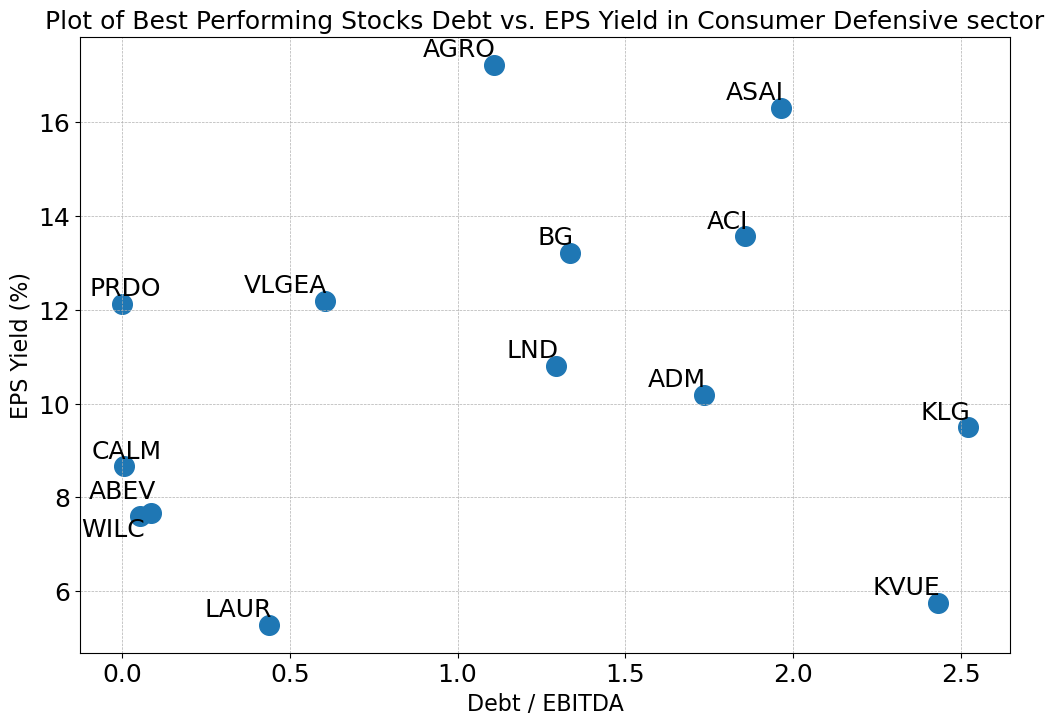

In [9]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield (%)',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

excluded_codes = ['BTI','STG']
plot_data_1 = final_selection[~final_selection['Code'].isin(excluded_codes)]

scatter = plt.scatter(plot_data_1['Debt'], plot_data_1['EPS Yield']*100, s = 200) 

texts = []
for i, row in plot_data_1.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield']*100, row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

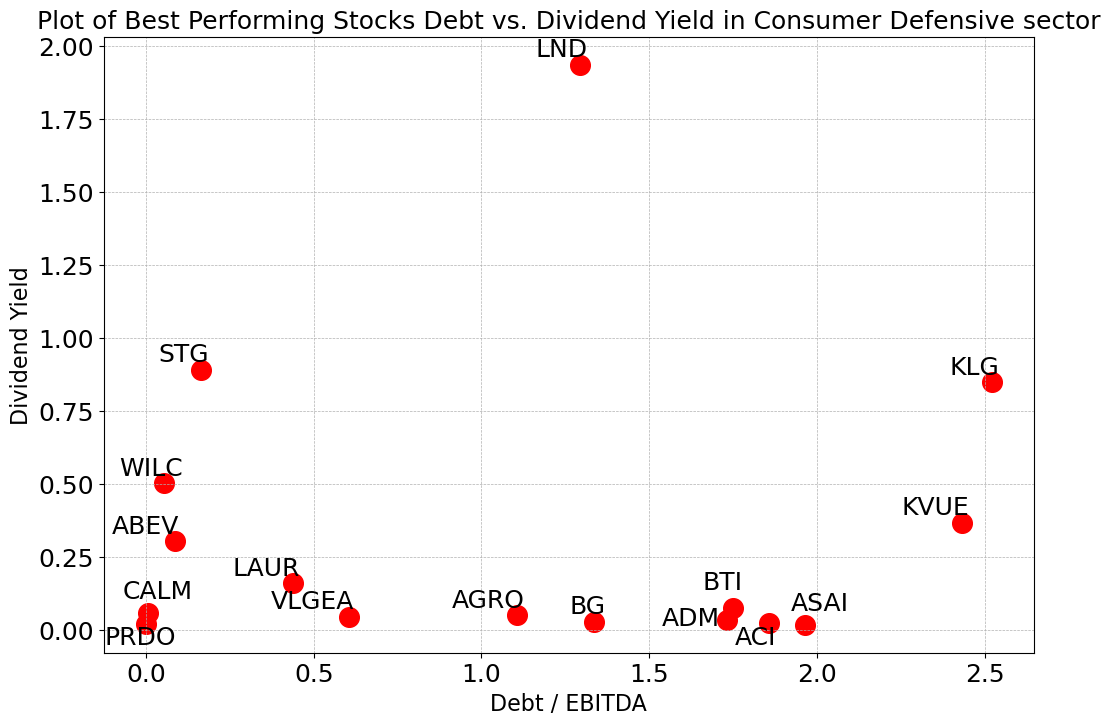

In [26]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

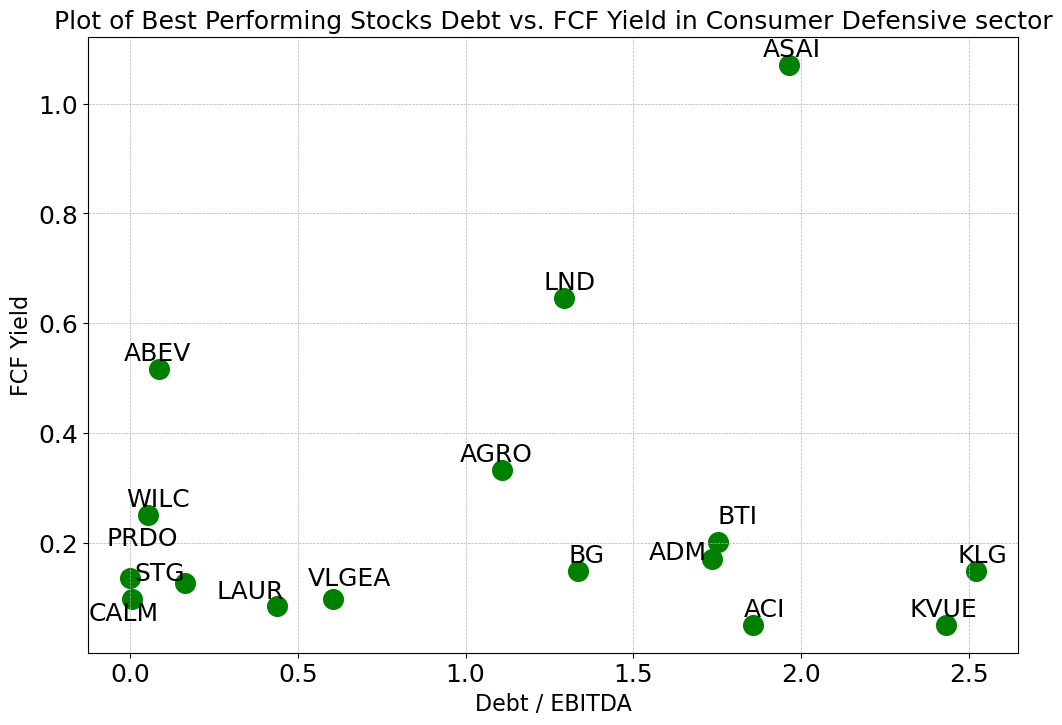

In [27]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [40]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [41]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [42]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


PRDO
CALM
WILC
ABEV
LND
STG
KLG
KVUE
LAUR
BTI
AGRO
ASAI
ACI
BG
VLGEA
ADM


In [57]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue

KLG price error: list index out of range


In [50]:
print(all_returns)

[[0.30605212645405994, 0.28325295250430305, 0.9221278695777957], [-0.009626649339454103, 0.11301712866346884, 0.3454997743558133], [-0.055220883534136615, -0.0791932911256153, -0.2365916779568889], [-0.10612244897959193, -0.15769230769230774, -0.1981252974991762], [0.02235772357723584, 0.024439918533604908, 0.20898930417017195], [-0.2849949647532729, -0.21198668146503888, 1.2756410256410255], [-0.03600452937580803, -0.040800861484465385, -0.20402455774545344], [0.062371487320082256, 0.22432859399684044, 0.32381326546299294], [0.056285810583080485, 0.0807865532771904, 0.07836930191587754], [-0.1250539381753748, -0.051288177437980344, 0.06567367797197704], [-0.14598540145985403, -0.13140311804008917, 0.03356890459363949], [-0.02159629777752376, -0.0262048050040279, 0.015843199288168224], [0.033573237600652034, 0.23409103856890562, 0.21192251573227822], [0.06850282485875711, 0.20729483767749357, 0.5214210655980855], [-0.01175405286055669, 0.1912334137225324, -0.10457505954814181]]


In [60]:
KLG_price_today = float(api.get_eod_historical_stock_market_data('KLG.US', from_date=today, to_date=today)[0]['adjusted_close'])
KLG_price_60 = float(api.get_eod_historical_stock_market_data('KLG.US', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
KLG_price_120 = float(api.get_eod_historical_stock_market_data('KLG.US', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
returns_60 = (KLG_price_today - KLG_price_60) / KLG_price_60
returns_120 = (KLG_price_today - KLG_price_120) / KLG_price_120
returns_year = 0
KLG_returns = ['KLG',returns_60,returns_120,returns_year]
KLG_df = pd.DataFrame({'Code': ['KLG'], '60 Days': [returns_60], '120 Days':[returns_120], '1 Year':[returns_year]}, index=[0])
print(KLG_df)

  Code     60 Days   120 Days  1 Year
0  KLG -0.03526593 0.45362071       0


In [25]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [58]:
all_returns.append(GSPC_returns)

In [62]:
code_list = []
for stock in stocks_Best:
    if stock['General']['Code'] != 'KLG':
        code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [63]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)

df_returns = pd.concat([KLG_df, df_returns]).reset_index(drop=True)


filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

In [70]:
print(api.get_eod_historical_stock_market_data(symbol='KLG.US', from_date='2023-01-01', to_date='2023-12-01'))

[{'date': '2023-09-27', 'open': 21, 'high': 21, 'low': 17, 'close': 17, 'adjusted_close': 16.4363, 'volume': 5802}, {'date': '2023-09-28', 'open': 16, 'high': 16, 'low': 16, 'close': 16, 'adjusted_close': 15.4694, 'volume': 525}, {'date': '2023-09-29', 'open': 15.26, 'high': 15.3, 'low': 13.75, 'close': 14.68, 'adjusted_close': 14.1932, 'volume': 5382}, {'date': '2023-10-02', 'open': 13.8, 'high': 15.05, 'low': 12.7662, 'close': 13.35, 'adjusted_close': 12.9073, 'volume': 19934461}, {'date': '2023-10-03', 'open': 12.69, 'high': 12.9196, 'low': 11.16, 'close': 11.24, 'adjusted_close': 10.8673, 'volume': 8262500}, {'date': '2023-10-04', 'open': 11.4, 'high': 12.18, 'low': 10.75, 'close': 10.8, 'adjusted_close': 10.4419, 'volume': 3649109}, {'date': '2023-10-05', 'open': 10.56, 'high': 10.74, 'low': 9.85, 'close': 10.19, 'adjusted_close': 9.8521, 'volume': 9617697}, {'date': '2023-10-06', 'open': 10, 'high': 10.74, 'low': 9.76, 'close': 10.39, 'adjusted_close': 10.0455, 'volume': 6432069}

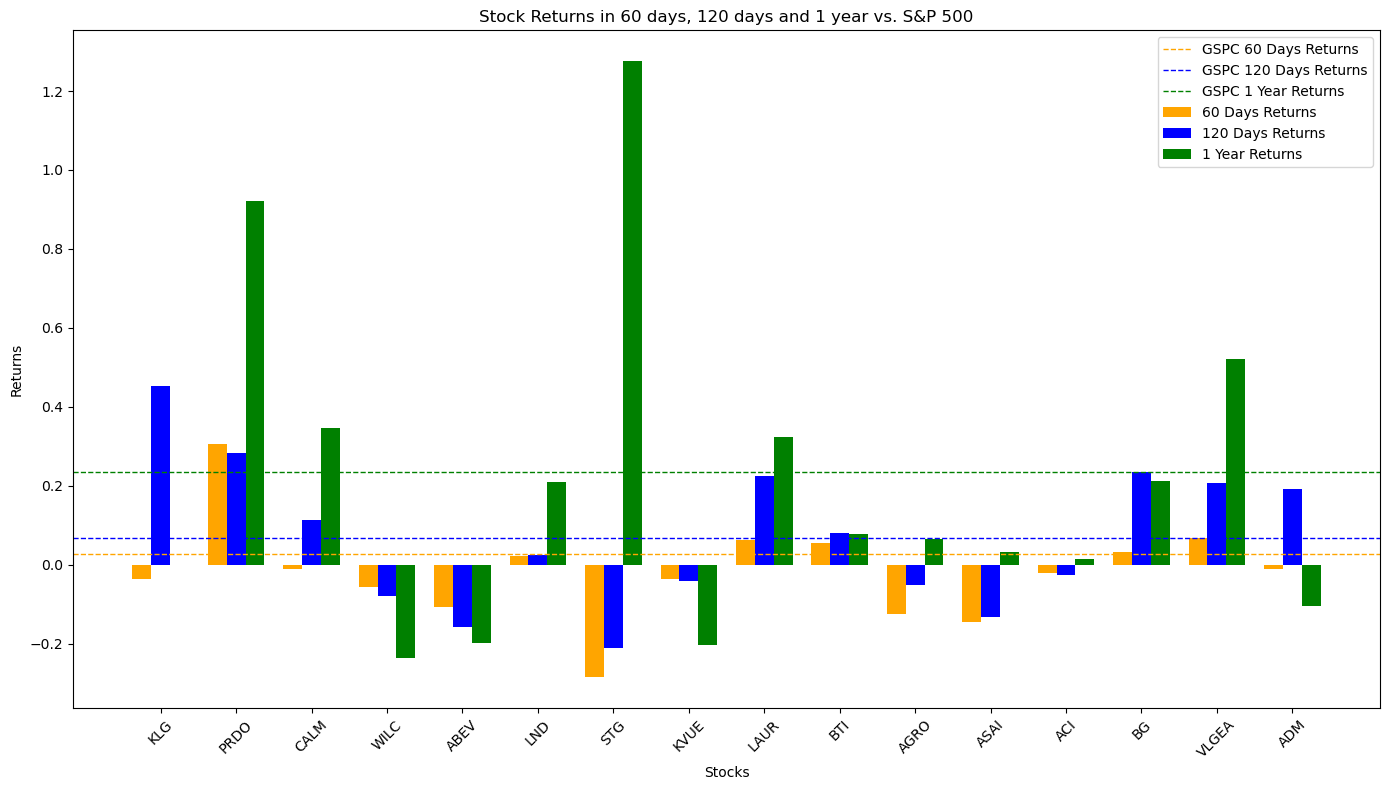

In [71]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [72]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/(size-1)
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is -1.77%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 6.96%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 21.73%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

0      PRDO
5      CALM
7      WILC
13     ABEV
17      LND
20      STG
21      KLG
22     KVUE
24     LAUR
27      BTI
30     AGRO
32     ASAI
33      ACI
36       BG
38    VLGEA
43      ADM
Name: Code, dtype: object


In [19]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []
skip_stock = 'KLG'

for s in code_list:
    if s == skip_stock:
        continue 
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

STG on 2023-11-27 error: list index out of range
[['STG', '2023-11-27']]
15


In [20]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[0.         0.04635701 0.05373033 0.06029539 0.06536156 0.06871782
 0.09193372 0.12482869 0.13002399 0.17153626 0.17412111 0.17098344
 0.20634374 0.21337547 0.19089171 0.13278599 0.11899933 0.1126729
 0.09307572 0.11277493 0.09201951 0.0950252  0.12559319 0.123736
 0.14645424 0.15159276 0.2160871  0.19446809 0.21087608 0.22235467
 0.27035371 0.23919993 0.22066866 0.18703681 0.22615756 0.18766095
 0.18194674 0.17118203 0.18660309 0.21549185 0.24581539 0.24287299
 0.25760928 0.25934866 0.25282216 0.20084944 0.20019145 0.19777665
 0.24942279 0.26455195 0.27281542 0.26624807 0.21728402]


In [21]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [22]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Consumer Defensive Sector is:  0.06751283620612393


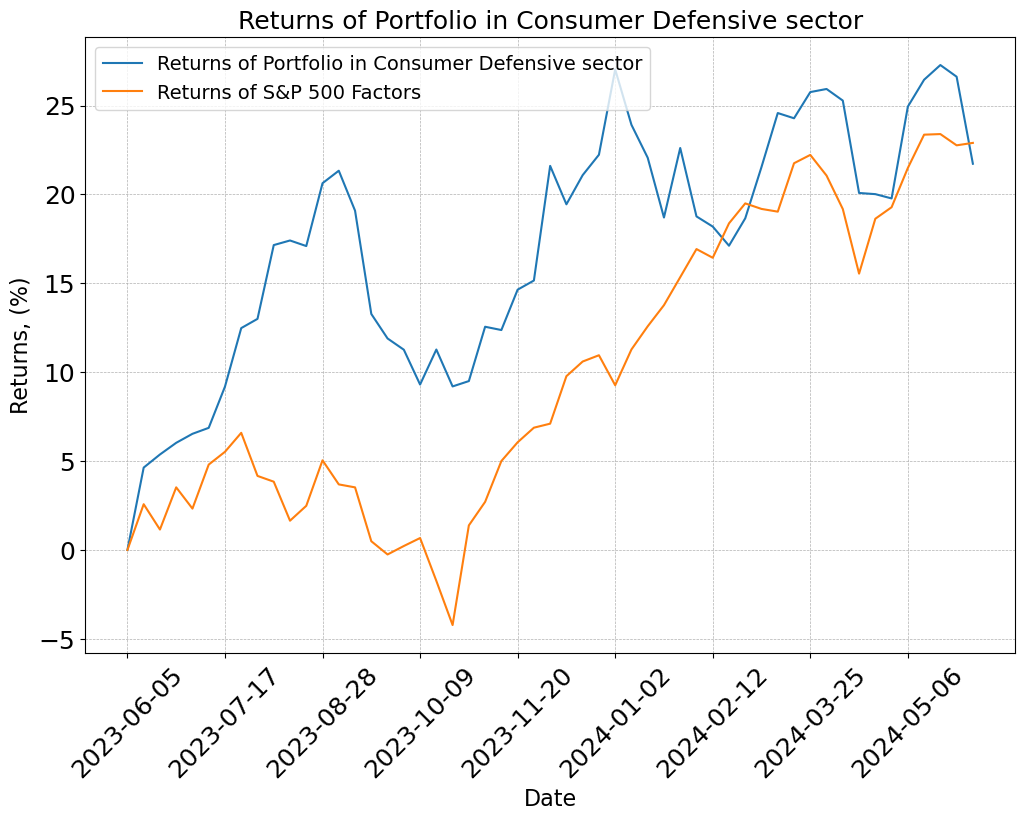

In [23]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()